# Limpieza de datos

Realice las operaciones y describa lo que va encontrando


## 1. Vista rápida al dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [4]:
df = pd.read_csv('dataset_videojuegos.csv')
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


### Se analizo que la columna **'user_review'** es una columna float y esta como object

#### Asi que se cambiara el tipo de columna

In [7]:
#df['user_review'] = data['user_review'].astype(float)

#### Aqui me di cuenta que no todos los valores son numericos

#### Asi que hare una consullta para ver los valores no numericos

In [9]:
# Filtrar los valores que no son numéricos
no_numericos = df[~df["user_review"].str.replace('.', '', 1).str.isnumeric()]

# Mostrar los valores problemáticos
print(no_numericos["user_review"].unique())


['tbd']


#### Solo **'tbd'** no es numerico, asi que cambaire todos los tbd por Nan

In [11]:
df["user_review"] = df["user_review"].replace("tbd", 0.0)

print(df["user_review"].unique())  # Debería mostrar NaN en lugar de "tbd"

['9.1' '7.4' '7.7' '8.4' '7.9' '8.0' '8.3' '6.2' '8.7' '7.5' '8.8' '8.5'
 '8.6' '8.9' '8.2' '9.2' '7.8' '9.0' '9.3' '8.1' '6.8' '7.6' '6.9' '6.6'
 '7.3' '7.2' '9.4' '5.7' '6.0' '5.8' '7.1' '3.3' '5.0' '5.5' '6.5' '5.9'
 '6.7' '3.8' '6.4' '7.0' '6.3' '4.9' 0.0 '5.3' '3.5' '4.7' '6.1' '4.8'
 '4.1' '5.6' '4.4' '5.4' '4.6' '3.1' '5.2' '4.3' '1.8' '4.5' '5.1' '4.2'
 '4.0' '9.7' '3.2' '2.9' '2.1' '2.4' '3.4' '3.0' '3.7' '2.2' '2.6' '2.7'
 '2.5' '2.8' '3.9' '2.0' '9.6' '1.5' '3.6' '1.4' '1.2' '0.9' '1.9' '1.1'
 '1.7' '0.8' '1.0' '0.6' '2.3' '0.5' '1.6' '0.2' '0.7' '1.3']


#### Ahora si camabiar el tipo de columna a float

In [13]:
df['user_review'] = df['user_review'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18800 non-null  object 
 1   platform      18800 non-null  object 
 2   release_date  18800 non-null  object 
 3   summary       18686 non-null  object 
 4   meta_score    18800 non-null  int64  
 5   user_review   18800 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 881.4+ KB


## 2. Datos duplicados

In [15]:
# Identificar las filas duplicadas
duplicadas = df.duplicated().sum()
duplicadas

0

### No hay ningun registro duplicado

## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [18]:
# Contar la data faltante (nulos)
df.isnull().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

#### Podemos ver que summary tiene 114 datos nulos

In [20]:
for col in df.columns:
    porcentaje = (df[col].isnull().sum() / len(df)) * 100
    if porcentaje > 0: #Filtra solo los que tengan valores faltantes
        print(f"Filas faltantes en '{col}': {df[col].isnull().sum()}. porcentaje: {porcentaje:.2f}%")

Filas faltantes en 'summary': 114. porcentaje: 0.61%


#### Como es poco porcentaje de filas se puede eliminar los datos nulos de summary 

In [22]:
df.dropna(subset = 'summary', inplace=True)
df.dropna(subset = 'summary').isnull().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

In [ ]:
df.info()

## 4. Verifique outlaiers de cada fila

In [25]:
# Obtener las columnas con valores numericos
colsnum = df._get_numeric_data().columns
print(colsnum)
# Obtener las columnas con valores categoricos
cols_categoricos = df.select_dtypes(include=['object']).columns
print(cols_categoricos)

Index(['meta_score', 'user_review'], dtype='object')
Index(['name', 'platform', 'release_date', 'summary'], dtype='object')


#### Se ve que solo hay dos datos numericos y varios datos categoricos

## 4.1 Datos numéricos

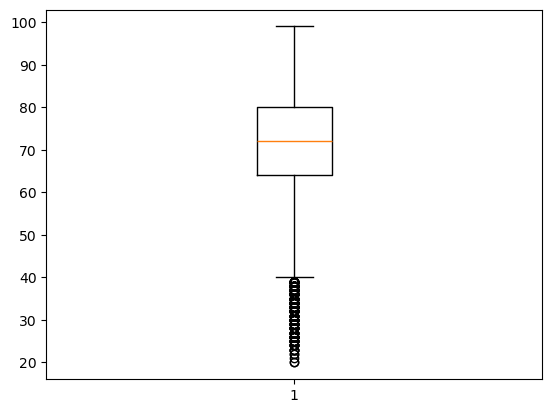

In [28]:
plt.boxplot(df['meta_score'])
plt.show()

#### Podemos ver que a pesar de que los valores se concentran mas entre **65-80** los valores menores como **20-40**
#### pueden ser ciertos porque no son negativos

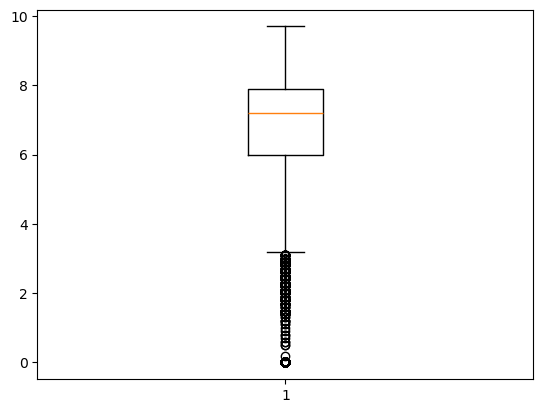

In [30]:
plt.boxplot(df['user_review'])
plt.show()

#### Como tampoco hay datos negativos, no es necesario eliminar los datos

## 4.2 Datos categóricos

In [32]:
for col in cols_categoricos:
    print(f"Columna {col}: {df[col].unique()} {df[col].nunique()} subniveles")


Columna name: ['The Legend of Zelda: Ocarina of Time' "Tony Hawk's Pro Skater 2"
 'Grand Theft Auto IV' ... 'Drake of the 99 Dragons'
 'Afro Samurai 2: Revenge of Kuma Volume One'
 'Infestation: Survivor Stories (The War Z)'] 12159 subniveles
Columna platform: [' Nintendo 64' ' PlayStation' ' PlayStation 3' ' Dreamcast' ' Xbox 360'
 ' Wii' ' Xbox One' ' PC' ' Switch' ' PlayStation 2' ' PlayStation 4'
 ' GameCube' ' Xbox' ' Wii U' ' Game Boy Advance' ' 3DS' ' Xbox Series X'
 ' DS' ' PlayStation Vita' ' PlayStation 5' ' PSP' ' Stadia'] 22 subniveles
Columna release_date: ['November 23, 1998' 'September 20, 2000' 'April 29, 2008' ...
 'July 5, 2007' 'April 25, 2001' 'July 6, 2006'] 4522 subniveles
Columna summary: ['As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined 

#### Ahora Graficamos

In [ ]:
# Graficar los subniveles de cada variable categórica
fig, ax = plt.subplots(nrows=len(cols_categoricos), ncols = 1, figsize =(10,30))
fig.subplots_adjust(hspace = 0.8)

# Graficar
for i,col in enumerate(cols_categoricos):
    sea.countplot(x= col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 20, size = 6)


#### Podemos ver que no hay anomalias en los datos

In [ ]:
# Guardar los datos en un dataset nuevo y limpio
df.to_csv("dataset_videojuegos_clean.csv")